# First try to segment starch images using edge detection (canny.cv)

In [14]:
# load libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [15]:
# load simple image
img = cv.imread('./Potato starch 20x brightfield.jpg',cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#img_cpy = img.copy()
#img_cpy_2 = img.copy()
#img_norm = cv.normalize(img, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

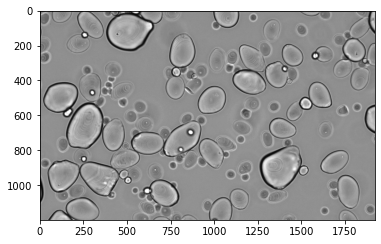

In [16]:
### show the picture
plt.imshow(img,cmap = 'gray')

In [17]:
edges = cv.Canny(img,8,35)

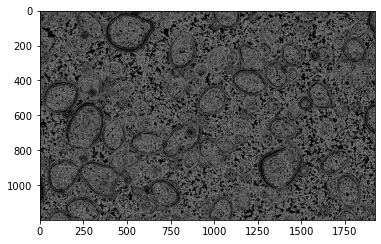

In [18]:
### show edges (naive)
plt.imshow(edges,cmap = 'gray')

# Let's check out blurring as preprocessing

## Organised block filter

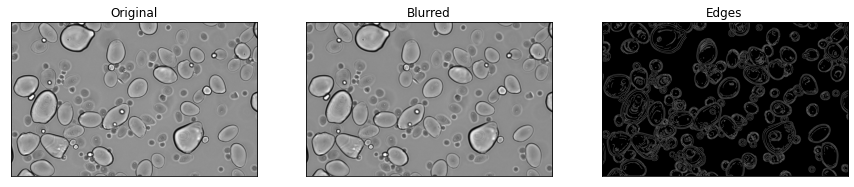

In [19]:
blur_obf = cv.blur(img,(5,5))
edges_obf = cv.Canny(blur_obf,8,35)
plt.figure(figsize = (15,10))
plt.subplot(131),plt.imshow(img,cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur_obf,cmap = 'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges_obf,cmap = 'gray'),plt.title('Edges')
plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian filter

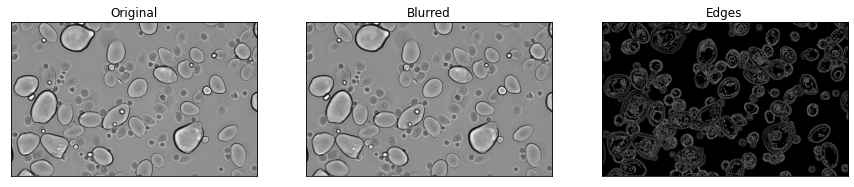

In [20]:
blur_gauss = cv.GaussianBlur(img,(5,5),0)
edges_gauss = cv.Canny(blur_gauss,8,35)
plt.figure(figsize = (15,10))
plt.subplot(131),plt.imshow(img,cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur_gauss,cmap = 'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges_gauss,cmap = 'gray'),plt.title('Edges')
plt.xticks([]), plt.yticks([])
plt.show()

## Median blur

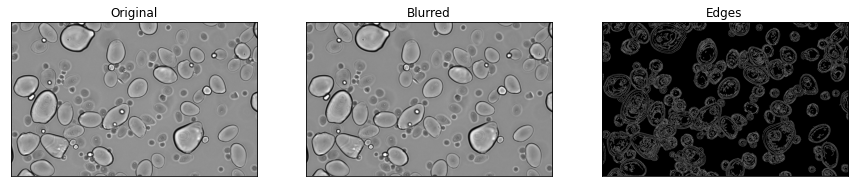

In [21]:
blur_med = cv.medianBlur(img, ksize=5)
edges_med = cv.Canny(blur_med,8,35)
plt.figure(figsize = (15,10))
plt.subplot(131),plt.imshow(img,cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur_med,cmap = 'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges_med,cmap = 'gray'),plt.title('Edges')
plt.xticks([]), plt.yticks([])
plt.show()

## Bilateral filter

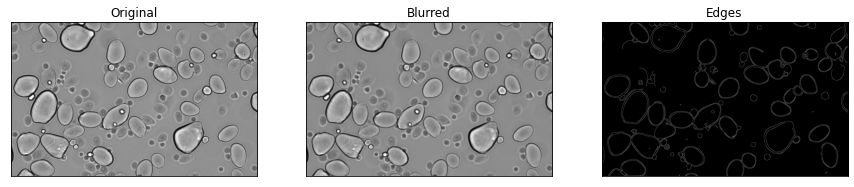

In [22]:
img_3 = cv.blur(img, (5,5))
blur_bf = cv.bilateralFilter(img_3,5,50,150)
edges_bf = cv.Canny(blur_bf,5,150)
plt.figure(figsize = (15,10))
plt.subplot(131),plt.imshow(img,cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur_bf,cmap = 'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges_bf,cmap = 'gray'),plt.title('Edges')
plt.xticks([]), plt.yticks([])
plt.show()

# Overview of all tested blurring algorithms

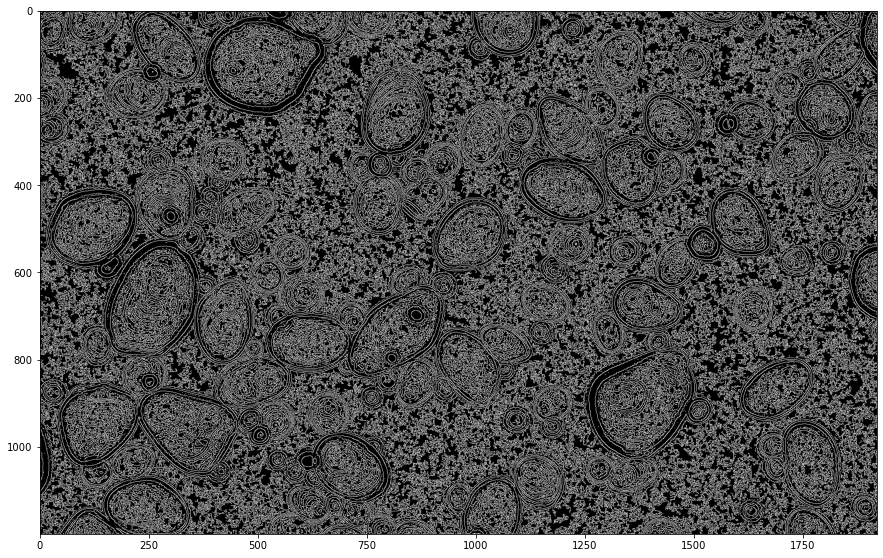

In [23]:
plt.figure(figsize = (15,10))
plt.imshow(edges,cmap = 'gray')

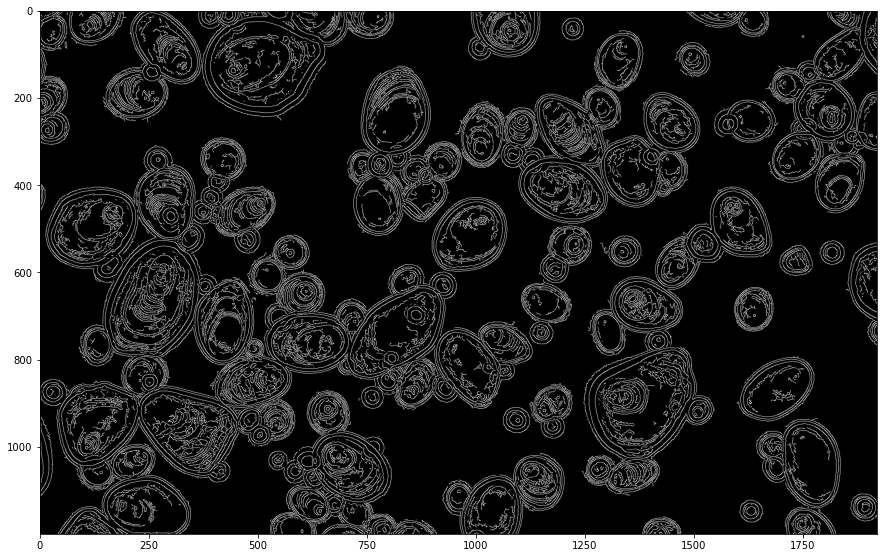

In [24]:
plt.figure(figsize = (15,10))
plt.imshow(edges_gauss,cmap = 'gray')

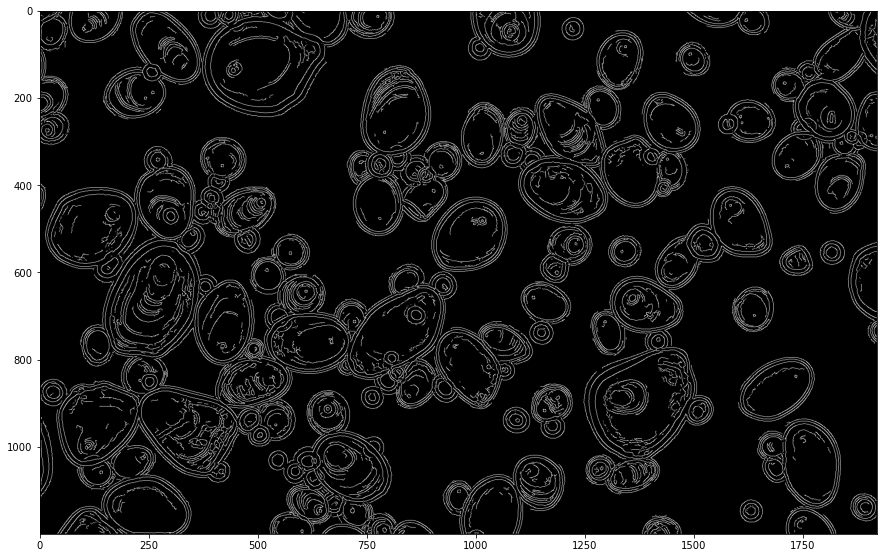

In [25]:
plt.figure(figsize = (15,10))
plt.imshow(edges_obf,cmap = 'gray')

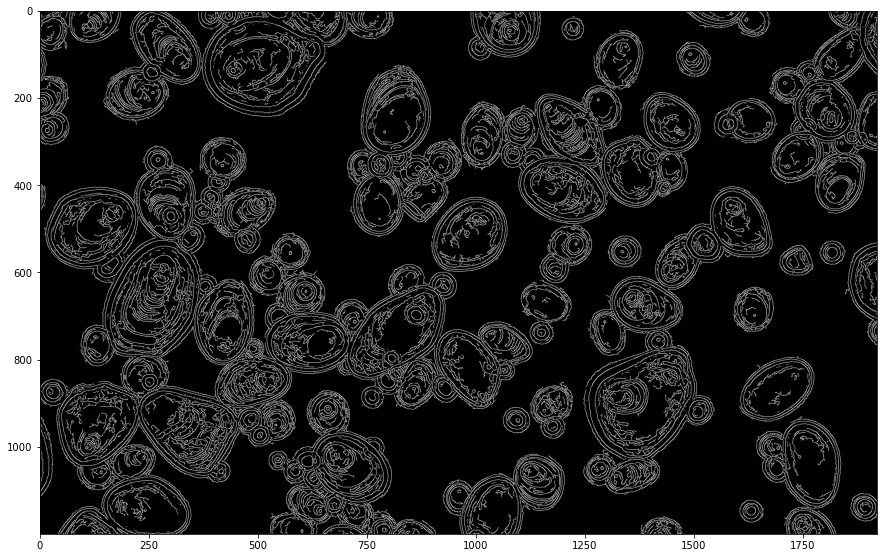

In [26]:
plt.figure(figsize = (15,10))
plt.imshow(edges_med,cmap = 'gray')

## Winner: Bilateral Filter

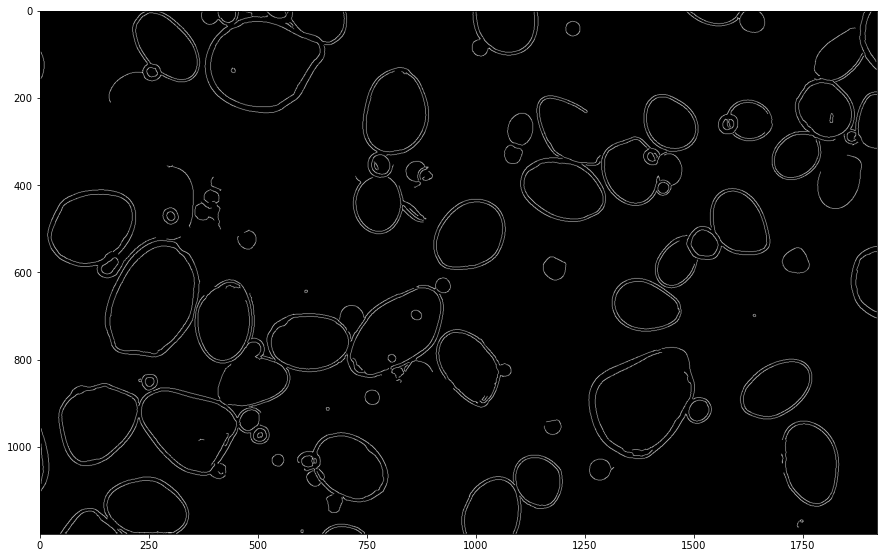

In [27]:
plt.figure(figsize = (15,10))
plt.imshow(edges_bf,cmap = 'gray')

In [28]:
blur_bf = cv.bilateralFilter(img,5,50,150)
edges_bf = cv.Canny(blur_bf,5,150)



# Let's stick to the bilateral filter (last one) for the moment

In [29]:
kernel = np.ones((3,3), np.uint8)
closed = cv.morphologyEx(edges_bf, cv.MORPH_CLOSE, kernel, iterations=3)

In [30]:
contours, hierarchy = cv.findContours(closed,  
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

In [33]:
%%capture
mask = np.zeros_like(img)
cv.drawContours(img, contours, -1, (0, 255, 0), 3)

In [36]:
out = np.zeros_like(img)
out[mask == 255] = img[mask == 255]

In [37]:
%%capture
cv.fillPoly(out, contours, 255)

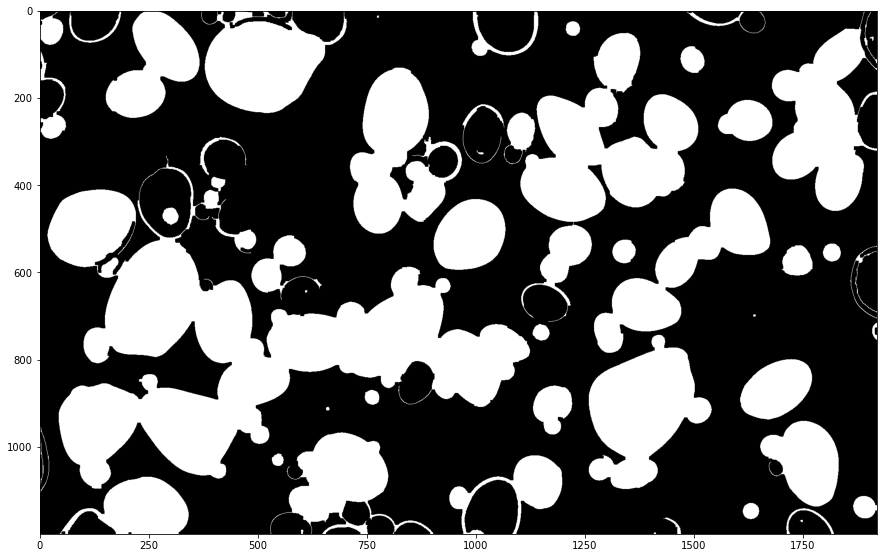

In [38]:
plt.figure(figsize = (15,10))
plt.imshow(out,cmap = 'gray') 

In [39]:
#res = cv.bitwise_and(img_cpy,img_cpy,mask = out)
#plt.figure(figsize = (15,10))
#plt.imshow(res,cmap = 'gray')

# Let's try getting a better result using morphological operations

In [40]:
kernel = np.ones((2,2), np.uint8)
closed = cv.morphologyEx(edges_bf, cv.MORPH_CLOSE, kernel, iterations=2)


In [41]:
#plt.figure(figsize = (15,10))
#plt.imshow(closed,cmap = 'gray')

In [42]:
contours_2, hierarchy_2 = cv.findContours(closed,  
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

In [44]:
mask_2 = np.zeros_like(img)
cv.drawContours(img, contours_2, -1, (0, 255, 0), 3)
out_2 = np.zeros_like(img)
out_2[mask == 255] = img[mask == 255]

In [45]:
%%capture
cv.fillPoly(out_2, contours_2, 255)

(([], []), ([], []))

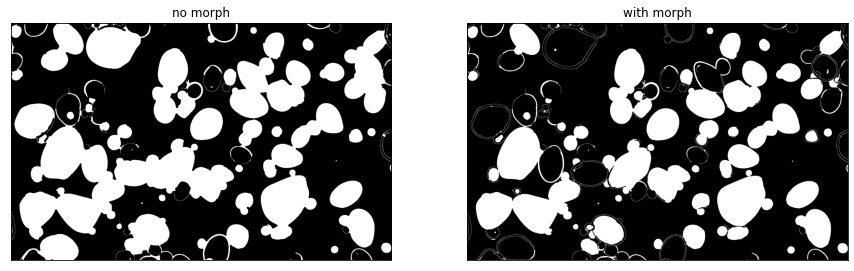

In [46]:
plt.figure(figsize = (15,10))
plt.subplot(121),plt.imshow(out,cmap = 'gray'),plt.title('no morph')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(out_2,cmap = 'gray'),plt.title('with morph')
plt.xticks([]), plt.yticks([])

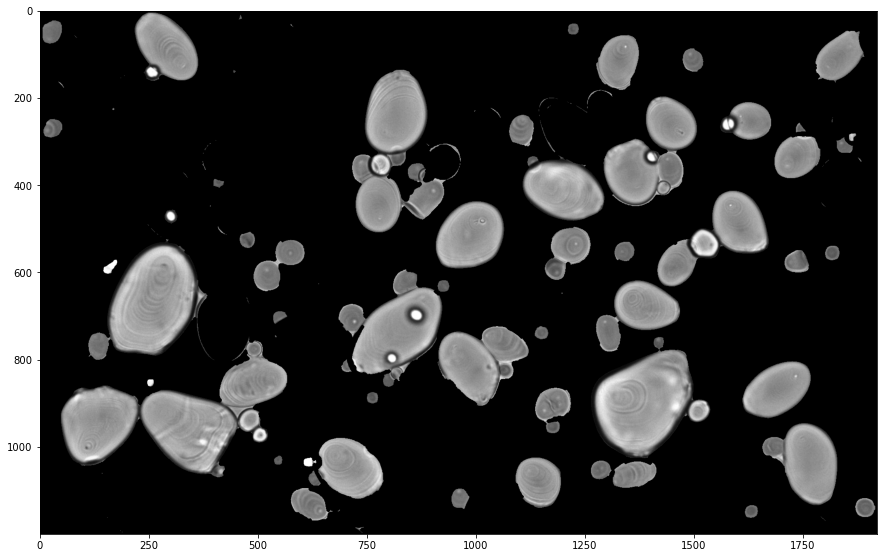

In [49]:
res = cv.bitwise_and(img,img,mask = out_2)
plt.figure(figsize = (15,10))
plt.imshow(res,cmap = 'gray')